<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/parameter_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from runpy import run_path

import numpy as np
from scipy.stats import beta, norm

from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, fill_between, vlines, hlines

In [2]:
!rm -rf try-colab
!git clone https://github.com/ctarrington/try-colab.git

rv_utils = run_path("/content/try-colab/myutils/rv_utils.py")
plot_ci = rv_utils.get('plot_ci')
print_ci = rv_utils.get('print_ci')
plot_distributions = rv_utils.get('plot_distributions')

Cloning into 'try-colab'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 149 (delta 72), reused 16 (delta 2), pack-reused 0
Receiving objects: 100% (149/149), 1.09 MiB | 6.74 MiB/s, done.
Resolving deltas: 100% (72/72), done.


## Few Successes

mean:  0.0075  median:  0.007491793171661221
leftCI 0.04999999999999999 rightCI 0.95
90.0  percent confidence interval 0.0068047141226151575  to  0.00822328065362432
Probability  0.0068047141226151575  <  trial p  <  0.00822328065362432  =  0.9000000000000354


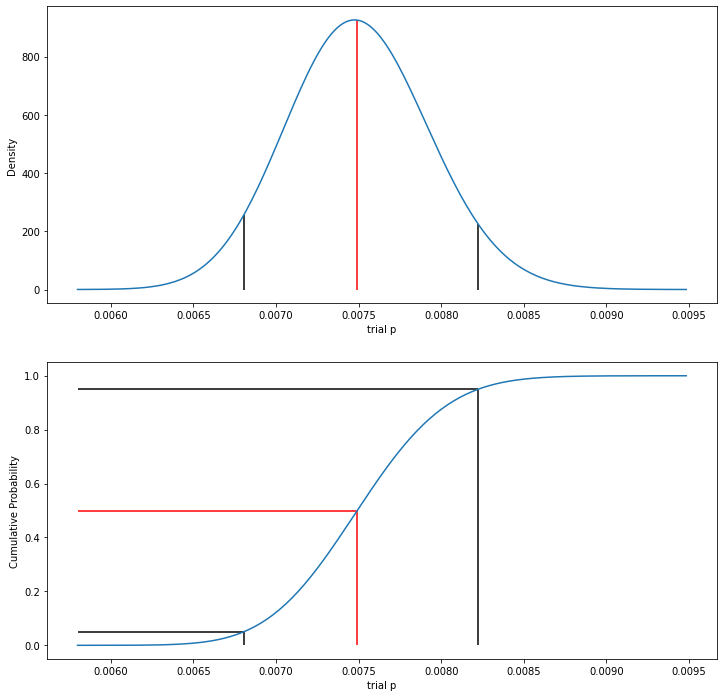

In [3]:
rv = beta(300, 39700)
plot_ci(rv, 0.9, 'trial p')

## Skewed right

mean:  0.9090909090909091  median:  0.9173098400475259
leftCI 0.04999999999999999 rightCI 0.95
90.0  percent confidence interval 0.8160565318230713  to  0.9739569539514824
Probability  0.8160565318230713  <  trial p  <  0.9739569539514824  =  0.9


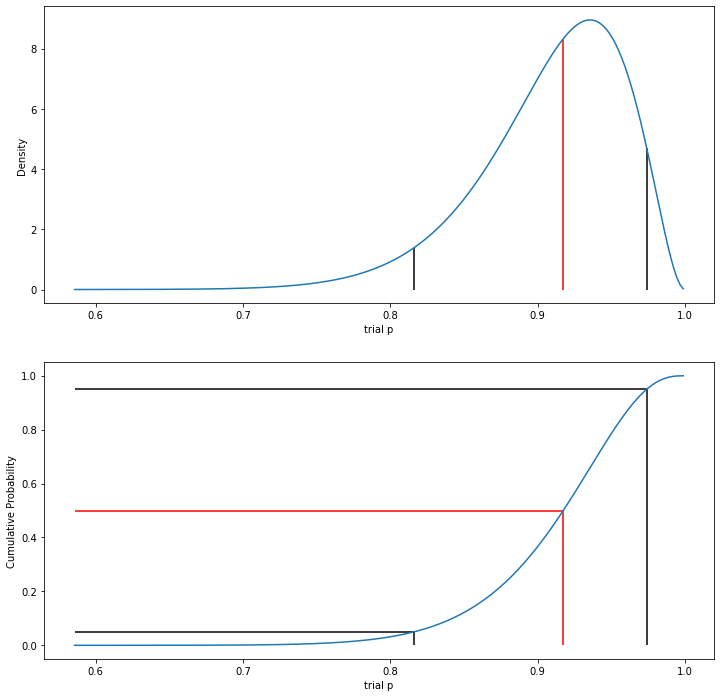

In [4]:
rv = beta(30, 3)
plot_ci(rv, 0.9, 'trial p')

## estimate using normal distribution

In [5]:
heights = [7.8, 9.4, 10, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4]
μ = np.mean(heights)
σ = np.std(heights)
rv = norm(μ, σ)

mean:  8.190000000000001  median:  8.190000000000001
leftCI 0.0005000000000000004 rightCI 0.9995
99.9  percent confidence interval 4.64767499582816  to  11.732325004171877
Probability  4.64767499582816  <  height  <  11.732325004171877  =  0.999


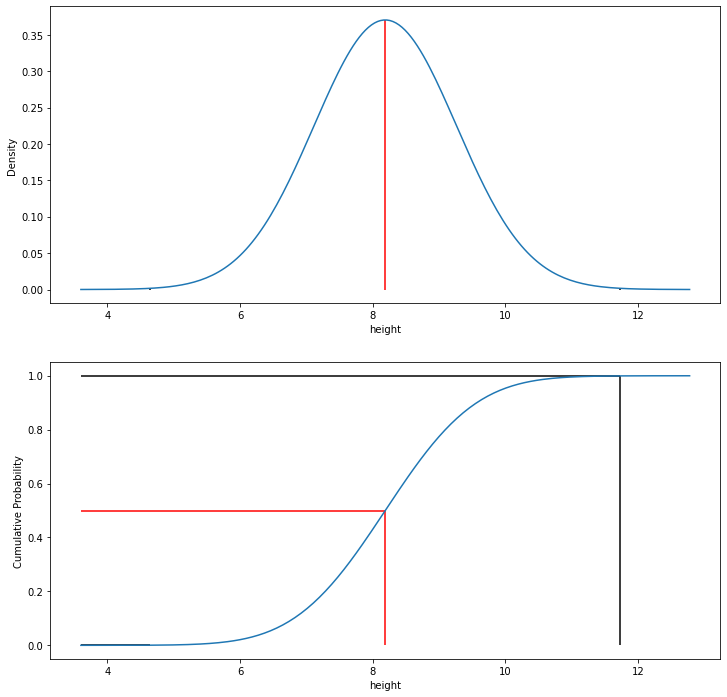

In [6]:
plot_ci(rv, 0.999, 'height')

## estimation of future results using beta

In [7]:
rv = beta(10, 20)
lowCI = (1-0.95)/2
highCI = 1-lowCI
[low, high] = rv.ppf([lowCI, highCI])
print('95% CI', low, high)
future_prediction = [40*low, 40*high]
print('95% CI for 40 more attempts', future_prediction)

95% CI 0.17938364923511183 0.50832335380999
95% CI for 40 more attempts [7.175345969404473, 20.332934152399602]


## little data, no prior

mean:  0.4  median:  0.3857275681323896
leftCI 0.025000000000000022 rightCI 0.975
95.0  percent confidence interval 0.06758598648854298  to  0.8058795503167566
Probability  0.06758598648854298  <  conversion rate  <  0.8058795503167566  =  0.95


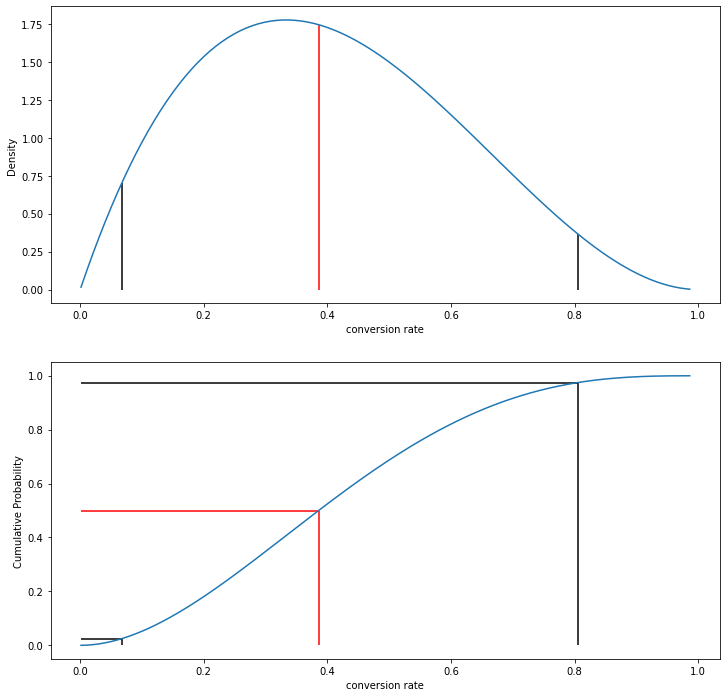

In [8]:
rv = beta(2,3)
plot_ci(rv, 0.95, 'conversion rate')

## little data with weak prior

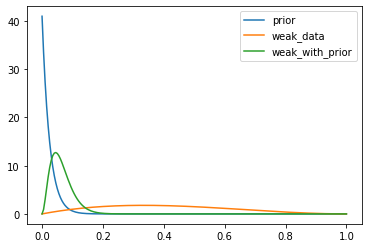

In [9]:
# prior of 2.4% success => beta(1,41)
# beta(1,41) * beta(2,3) = beta(3, 44)
prior = beta(1, 41)
weak_data = beta(2,3)
weak_with_prior = beta(3,44) 
plot_distributions([prior, weak_data, weak_with_prior], ['prior', 'weak_data', 'weak_with_prior'])

## How do priors strength impact updates?

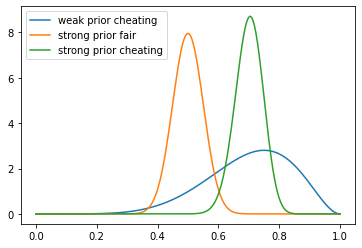

In [10]:
weak_prior_cheating = beta(7,3)
strong_prior_fair = beta(50, 50)
strong_prior_cheating = beta(70, 30)

plot_distributions(
    [weak_prior_cheating, strong_prior_fair, strong_prior_cheating],
    ['weak prior cheating', 'strong prior fair', 'strong prior cheating']
)



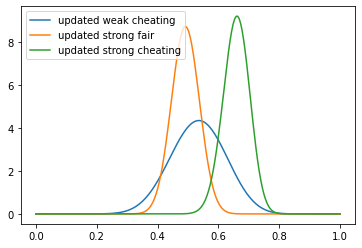

In [11]:
updated_weak_cheating = beta(7+9, 3+11)
updated_strong_fair = beta(50+9, 50+11)
updated_strong_cheating = beta(70+9, 30+11)

plot_distributions(
    [updated_weak_cheating, updated_strong_fair, updated_strong_cheating],
    ['updated weak cheating', 'updated strong fair', 'updated strong cheating']
)

In [12]:
print_ci(updated_weak_cheating, 0.95)
print_ci(updated_strong_fair, 0.95)
print_ci(updated_strong_cheating, 0.95)

95.0  of the distribution is between  0.3569387108039136  and  0.7055144170481589  with a median of  0.5340838211361092
95.0  of the distribution is between  0.4028805489092643  and  0.5807159954714556  with a median of  0.4916202164490634
95.0  of the distribution is between  0.5715070618331165  and  0.7401599672670114  with a median of  0.6592156882267591
